In [3]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, RandomTreesEmbedding, ExtraTreesClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, classification_report
import seaborn as sns
from catboost import CatBoostClassifier

train_df = pd.read_csv('C:\\Users\\graha\\Desktop\\titanic_train_kaggle.csv')
display(train_df.head())
test_df = pd.read_csv("C:\\Users\\graha\\Desktop\\titanic_test_kaggle.csv")
display(test_df.head())
pd.set_option('display.max_rows', 100)
print(train_df.info())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [2]:
x = list(range(5,100,5))
for i in train_df['PassengerId']:
    if i not in (x):
        train_df = train_df.drop(train_df[train_df['PassengerId'] == i].index)

display(train_df.head(100))
print(train_df.info())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C
44,45,1,3,"Devaney, Miss. Margaret Delia",female,19.0,0,0,330958,7.8792,NaN,Q
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.0,1,0,349237,17.8000,NaN,S


<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 4 to 94
Data columns (total 12 columns):
PassengerId    19 non-null int64
Survived       19 non-null int64
Pclass         19 non-null int64
Name           19 non-null object
Sex            19 non-null object
Age            16 non-null float64
SibSp          19 non-null int64
Parch          19 non-null int64
Ticket         19 non-null object
Fare           19 non-null float64
Cabin          1 non-null object
Embarked       19 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 1.9+ KB
None


In order to work with the data in an effective matter, with various forms of classification algorithms, the data must be cleaned.  
To do so, we remove columns that aren't needed, replace null values with either the mean or mode of the column, and map categorical data to numnerical values.  

In [4]:
train_id = np.array(test_df.loc[:,'PassengerId'])
train_copy = train_df.copy(deep=True)
test_copy = test_df.copy(deep=True)
def AddFeatures(dataframe):
    dataframe['FamilySize'] = dataframe['SibSp'] + dataframe['Parch'] + 1
    dataframe['IsAlone'] = 0
    dataframe.loc[dataframe['FamilySize'] == 1, 'IsAlone'] = 1
    return dataframe

def cleandata(dataframe):
    dataframe.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Parch', 'SibSp'], inplace=True)
    #may not actually want to drop sibsp and parch
    dataframe['Sex'] = dataframe['Sex'].map({'male':1, 'female':0}).astype(int)
    dataframe['Embarked'] = dataframe['Embarked'].fillna(dataframe['Embarked'].mode(), inplace=False)
    dataframe['Embarked'] = dataframe['Embarked'].map({'S':0,'C':1,'Q':2, 'Nan':0})
    dataframe['Age'] = dataframe['Age'].fillna(dataframe['Age'].mean(), inplace=False)
    dataframe.loc[dataframe['Age'] <= 16, 'Age'] = 0
    dataframe.loc[(dataframe['Age'] >16) & (dataframe['Age'] <= 25), 'Age'] = 1
    dataframe.loc[(dataframe['Age'] > 25) & (dataframe['Age'] <= 34), 'Age'] = 3
    dataframe.loc[(dataframe['Age'] > 34)& (dataframe['Age'] <=43), 'Age'] = 4
    dataframe.loc[(dataframe['Age']> 43) & (dataframe['Age'] <= 62), 'Age'] = 5
    dataframe.loc[dataframe['Age'] > 62, 'Age'] = 6
    dataframe.loc[dataframe['Fare'] <= 10, 'Fare'] = 0
    dataframe.loc[(dataframe['Fare'] > 10) & (dataframe['Fare'] <= 25), 'Fare'] = 1
    dataframe.loc[(dataframe['Fare'] > 25) & (dataframe['Fare'] <= 75), 'Fare'] = 2
    dataframe.loc[(dataframe['Fare'] > 75) & (dataframe['Fare'] <= 125), 'Fare'] = 3
    dataframe.loc[(dataframe['Fare'] > 125), 'Fare'] = 4
    dataframe['Fare'] = dataframe['Fare'].fillna(dataframe['Fare'].mean(), inplace=False)
    return dataframe

def ModelScore(X_test, y_test, model):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    print('1= Survived', '0= Did Not Survive')
    print(classification_report(y_test, y_pred))
    roc_auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Model (area = %.2f)'% roc_auc)
    plt.plot([0,1],[0,1], 'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('REciever Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show
#def scaledata(dataframe):
    #dataframe['Age'] = scale(dataframe['Age'])
    #dataframe['Fare'] = scale(dataframe['Fare'])
    #return dataframe


test_df = AddFeatures(test_df)
train_df = AddFeatures(train_df)

test_df = cleandata(test_df)
train_df = cleandata(train_df)

#test_df = scaledata(test_df)
#train_df = scaledata(train_df)

display(train_df.head())
train_df.info()
display(test_df.head())
test_df.info()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,IsAlone
0,0,3,1,1.0,0.0,0.0,2,0
1,1,1,0,4.0,2.0,1.0,2,0
2,1,3,0,3.0,0.0,0.0,1,1
3,1,1,0,4.0,2.0,0.0,2,0
4,0,3,1,4.0,0.0,0.0,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int32
Age           891 non-null float64
Fare          891 non-null float64
Embarked      889 non-null float64
FamilySize    891 non-null int64
IsAlone       891 non-null int64
dtypes: float64(3), int32(1), int64(4)
memory usage: 52.3 KB


,Pclass,Sex,Age,Fare,Embarked,FamilySize,IsAlone
0,3,1,4.0,0.0,2,1,1
1,3,0,5.0,0.0,0,2,0
2,2,1,5.0,0.0,2,1,1
3,3,1,3.0,0.0,0,1,1
4,3,0,1.0,1.0,0,3,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass        418 non-null int64
Sex           418 non-null int32
Age           418 non-null float64
Fare          418 non-null float64
Embarked      418 non-null int64
FamilySize    418 non-null int64
IsAlone       418 non-null int64
dtypes: float64(2), int32(1), int64(4)
memory usage: 21.3 KB


As seen in the above cell, in the training data df.info(), there are two rows in the 'Embarked' column that didnt transfer from null to the mode of the 'Embarked' column. 
Below: dropping those two rows, found index by looking through train_df['Embedded'].isna() and seeing what two row indexes were 'True'

In [5]:
train_df.drop(train_df.index[[61,829]], inplace=True)
train_df.info()
train_df_cleaned_copy = train_df.copy()
test_df_cleaned_copy = test_df.copy()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
Survived      889 non-null int64
Pclass        889 non-null int64
Sex           889 non-null int32
Age           889 non-null float64
Fare          889 non-null float64
Embarked      889 non-null float64
FamilySize    889 non-null int64
IsAlone       889 non-null int64
dtypes: float64(3), int32(1), int64(4)
memory usage: 59.0 KB


In order to make sure all the data in the 'cleaned' dataframe is actually useful in predicting the output variable of Survival, we run a chi squared contingency test to determine the p-value of each feature.

All of the features end up with a p-value < 5.0e-2 which is sufficient evendence to reject the null hypothesis that the individual feature has no effect on the individuals survival. P-val being less than .05 means there is less than a 5% chance that the output would be the same without the influence of the given input variable. 

In [19]:
columns= train_df.columns
chi2 = []
pval = []
for i in columns:
    table = pd.crosstab([train_df['Survived']],train_df[i])
    chi, p, dof, expected = chi2_contingency(table.values)
    chi2.append(chi)
    pval.append(p)

zipped = list(zip(columns,chi2,pval))  
df = pd.DataFrame(zipped, columns=['Feature', 'Chi^2', 'P-Value'])
display(df)

,Feature,Chi^2,P-Value
0,Survived,884.771028,2.006539e-194
1,Pclass,100.980407,1.181362e-22
2,Sex,258.426610,3.779910e-58
3,Age,17.664660,3.397415e-03
4,Fare,111.243634,3.951261e-23
5,Embarked,26.489150,1.769922e-06
6,FamilySize,81.683656,2.239008e-14
7,IsAlone,36.939565,1.218481e-09


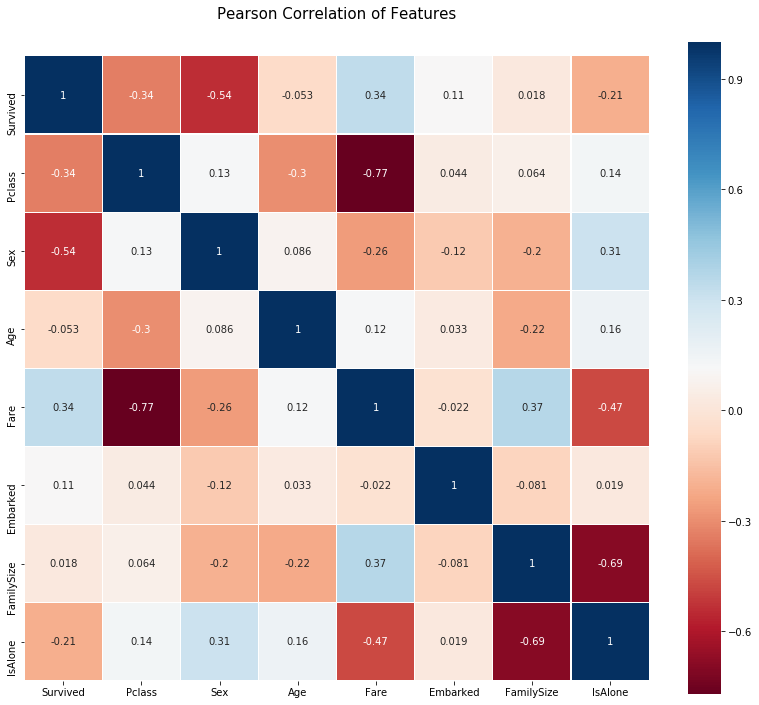

In [20]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_df.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [6]:
y_train_full = train_df.loc[:,'Survived']
X_train_full = train_df.loc[:, train_df.columns != 'Survived']
X_train, X_test, y_train, y_test = train_test_split(X_train_full, y_train_full, random_state=0)


In [11]:
param_grid = {
    'C':[.25,.5,1,100,1000,10000], 'penalty':['l1', 'l2'], 'solver':['saga', 'liblinear'],
    'fit_intercept':[True, False]
}

In [12]:
grid_logit = GridSearchCV(LogisticRegression(max_iter=10000), param_grid=param_grid, cv=5, n_jobs=-1)
model_grid_log = grid_logit.fit(X_train, y_train)
print(model_grid_log.best_params_)

{'C': 100, 'fit_intercept': True, 'penalty': 'l1', 'solver': 'saga'}


In [22]:
clf_log = LogisticRegression(C=100, penalty='elasticnet', l1_ratio=.8, solver='saga', max_iter=10000, fit_intercept=True )
model_log = clf_log.fit(X_train, y_train)
model_log.score(X_test,y_test)

0.757847533632287

In order to help me understand how well a given algorithm is predicting the data I create a simple code to sort the results into separate types: correct prediction of survive, correct prediction of not survive, incorrect prediction of survive, and incorrect prediction of not survive. 
Need to create neat graph of the numerical output to have it be more easily understood and compared 

Model Accuracy Score: 0.757847533632287
Correctly predicted survive 60 times
Correctly predicted not survive 109 times
Incorrectly predicted survive 23 times
Incorrectly predicted not survive 31 times
1= Survived 0= Did Not Survive
              precision    recall  f1-score   support

           0       0.78      0.83      0.80       132
           1       0.72      0.66      0.69        91

    accuracy                           0.76       223
   macro avg       0.75      0.74      0.75       223
weighted avg       0.76      0.76      0.76       223



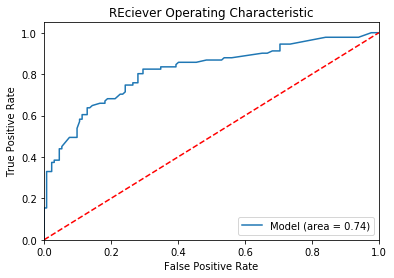

In [25]:
def AccuracyMetrics(X_test,y_test, model):
    predictions = np.array(model.predict(X_test))
    actual = np.array(y_test)
    c_pred_s = []
    c_pred_ns = []
    i_pred_s = []
    i_pred_ns = []
    for i in range(len(actual)):
        if actual[i] == 0:
            if predictions[i] == 0:
                c_pred_ns.append(0)
            if predictions[i] == 1:
                i_pred_s.append(1)
        if actual[i] == 1:
            if predictions[i] == 0:
                i_pred_ns.append(0)
            if predictions[i] == 1:
                c_pred_s.append(1)
                
    print('Model Accuracy Score:', model.score(X_test,y_test))
    print('Correctly predicted survive {} times'.format(len(c_pred_s)))
    print('Correctly predicted not survive {} times'.format(len(c_pred_ns)))
    print('Incorrectly predicted survive {} times'.format(len(i_pred_s)))
    print('Incorrectly predicted not survive {} times'.format(len(i_pred_ns)))
    
    

AccuracyMetrics(X_test, y_test, model_log)
#print(np.array(model.predict(X_test)))
#print(np.array(y_test))
#logistic = pd.DataFrame(model.predict_proba(X_train_full))
ModelScore(X_test, y_test, model_log)



Above: classifcation_report and Reciever Operating Characteristic graph. We really care about the precision, recall, and f1-score for evaluating the preformance of this specific classifcation algorithm with our data.  
Precision: 
- Correct predictions in that class(TruePos)/ times predicted that class(TruePos + FalsePos).  With above syntax:
- correctly predicted not survive (111)/ correctly pred not survive(111) + inocrrectly pred not survive(30) = .79
- "Out of the people we predicted to perish, what percentage actually did?"


Recall:
- Correct predictions in that class (TruePos)/ number of actual observations in that class (TruePos + FalseNeg)
- correctly predicted survive(61)/ actual number of survivers in 'y_test'(91) = .67
- "Out of passengers that truely survived, what ratio did we properly label"


F1-Score:
- Weighted average of precision and recall, better to look at than average or accuracy when classes have differnt weights
- 2*(Recall * Precision)/(Recall + Precision)


Reciever Operating Characteristic Graph:
- Blue line is models preformance, red is what it would be for random chance
- Perfect classification (perfect precision and recall) would be bent all the way to the top left corner
Below: GridSearchCV with this many options can take around an hour to compute

In [8]:
param_grid = [
    {'n_estimators':[100,500,1000], 'criterion':['gini','entropy'], 'max_depth':[5,8,10,15],
    'min_samples_split':[2,5,10,20], 'min_samples_leaf':[2,5,10], 'bootstrap':[True, False],
    'max_features':['auto','sqrt']}
]
rfc = RandomForestClassifier(random_state=12)
clf = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1)
model = clf.fit(X_train, y_train)
print(model.best_params_)

KeyboardInterrupt: 

Model Accuracy Score: 0.7802690582959642
Correctly predicted survive 56  times
Correctly predicted not survive 118  times
Incorrectly predicted survive 14  times
Incorrectly predicted not survive 35  times
1= Survived 0= Did Not Survive
              precision    recall  f1-score   support

           0       0.77      0.89      0.83       132
           1       0.80      0.62      0.70        91

    accuracy                           0.78       223
   macro avg       0.79      0.75      0.76       223
weighted avg       0.78      0.78      0.77       223



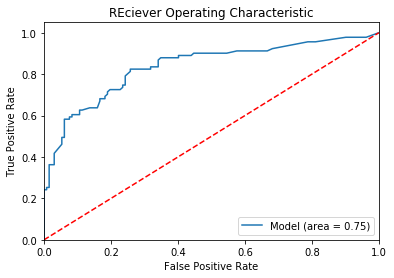

In [12]:
clf_rf = RandomForestClassifier(n_estimators=1000, criterion='gini', max_depth=5, min_samples_split=3, min_samples_leaf=2,
                             max_features='sqrt', bootstrap=True, random_state=0)
model_rf = clf_rf.fit(X_train, y_train)
AccuracyMetrics(X_test,y_test, model_rf)
#Forest = pd.DataFrame(model.predict_proba(X_train_full))
ModelScore(X_test, y_test, model_rf)

0.7354260089686099
Model Accuracy Score: 0.7354260089686099
Correctly predicted survive 54  times
Correctly predicted not survive 110  times
Incorrectly predicted survive 22  times
Incorrectly predicted not survive 37  times
1= Survived 0= Did Not Survive
              precision    recall  f1-score   support

           0       0.75      0.83      0.79       132
           1       0.71      0.59      0.65        91

    accuracy                           0.74       223
   macro avg       0.73      0.71      0.72       223
weighted avg       0.73      0.74      0.73       223



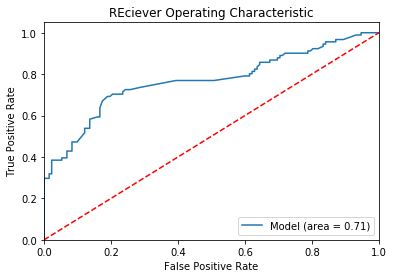

In [14]:
estimator = RandomForestClassifier(n_estimators=500, criterion='gini', max_depth=5, min_samples_split=5, min_samples_leaf=2,
                             max_features='auto', bootstrap=False, random_state=0)
clf = AdaBoostClassifier(base_estimator=estimator, n_estimators=500, learning_rate=.75, random_state=0)
model = clf.fit(X_train, y_train)
print(model.score(X_test,y_test))
AccuracyMetrics(X_test,y_test)
Ada = pd.DataFrame(model.predict_proba(X_train_full))
ModelScore(X_test, y_test, model)

Below is GridSearchCV to help me determine the best way to tune the hyper-params of the SVC classification algorithm.  Takes a very long time to compute. Estimation: 5{c options}*3{kernel options}*4{degree options}*4*2 = 480 combinations*~5 seconds per training each model = 40 min to run all options and score their accuracy then select best combination of params 


reduced number of options after writing the time calculation

In [10]:
param_grid = [
    {'C':[0.25,1,10,100], 'kernel':['poly','rbf'], 'degree':[2,3,4,5],
    'gamma':['scale','auto', .01,.05]}
]
estimator=SVC(random_state=0, max_iter=10000)
clf = GridSearchCV(estimator, param_grid=param_grid ,cv=5, n_jobs=-1, iid=False).fit(X_train,y_train)
print(clf.best_params_)

KeyboardInterrupt: 

Model Accuracy Score: 0.7802690582959642
Correctly predicted survive 60  times
Correctly predicted not survive 114  times
Incorrectly predicted survive 18  times
Incorrectly predicted not survive 31  times
1= Survived 0= Did Not Survive
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       132
           1       0.77      0.66      0.71        91

    accuracy                           0.78       223
   macro avg       0.78      0.76      0.77       223
weighted avg       0.78      0.78      0.78       223



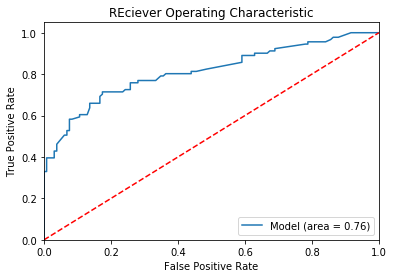

In [13]:
clf_svc = SVC(C=10, kernel='rbf', degree=2, gamma=.05, probability=True)
model_svc = clf_svc.fit(X_train, y_train)
AccuracyMetrics(X_test,y_test, model_svc)
#SupV = pd.DataFrame(model.predict_proba(X_train_full))
ModelScore(X_test, y_test, model_svc)

In [ ]:
clf = SVC(C=1, kernel='poly', degree=3, gamma=2, probability=True, max_iter=-1)
model = clf.fit(X_train, y_train)
AccuracyMetrics(X_test,y_test)
SupV = pd.DataFrame(model.predict_proba(X_train_full))
ModelScore(X_test, y_test, model)

Model Accuracy Score: 0.7533632286995515
Correctly predicted survive 55  times
Correctly predicted not survive 113  times
Incorrectly predicted survive 19  times
Incorrectly predicted not survive 36  times
1= Survived 0= Did Not Survive
              precision    recall  f1-score   support

           0       0.76      0.86      0.80       132
           1       0.74      0.60      0.67        91

    accuracy                           0.75       223
   macro avg       0.75      0.73      0.74       223
weighted avg       0.75      0.75      0.75       223



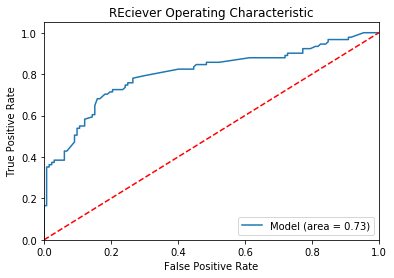

In [14]:
init = RandomForestClassifier(n_estimators=5000, criterion='gini', max_depth=5, min_samples_split=3, min_samples_leaf=2,
                             max_features='sqrt', bootstrap=True, random_state=0)
clf_gb = GradientBoostingClassifier(n_estimators=1000, min_samples_split=5, max_depth=4, min_samples_leaf=2, init=init,
                                random_state=0, max_features=4)
model_gb = clf_gb.fit(X_train, y_train)
AccuracyMetrics(X_test,y_test, model_gb)
#GBoost = pd.DataFrame(model.predict_proba(X_train_full))
ModelScore(X_test, y_test, model_gb)


In [36]:
param_grid={
    'iterations':[100,1000,2500], 'depth':[2,3,5,8],
    #'objective':['CrossEntropy','LogLoss', 'YetiRank'], 
    'leaf_estimation_backtracking':['AnyImprovement', 'Armijo', 'No'],
    'boosting_type':['Ordered', 'Plain']
}
clf = CatBoostClassifier(loss_function='Logloss',od_type='IncToDec', od_pval=10e-10, verbose=False,
                        task_type='GPU').grid_search(X=X_train, y=y_train, param_grid=param_grid,search_by_train_test_split=False,
                                                    verbose=False)
print(clf.params)
#model = clf.fit(X_train, y_train)
#AccuracyMetrics(X_test, y_test, model)
#ModelScore(X_test, y_test, model)

AttributeError: 'dict' object has no attribute 'params'

In [39]:
clf

{'params': {'depth': 5,
  'iterations': 100,
  'boosting_type': 'Plain',
  'leaf_estimation_backtracking': 'AnyImprovement'},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
 

Model Accuracy Score: 0.757847533632287
Correctly predicted survive 57 times
Correctly predicted not survive 112 times
Incorrectly predicted survive 20 times
Incorrectly predicted not survive 34 times
1= Survived 0= Did Not Survive
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       132
           1       0.74      0.63      0.68        91

    accuracy                           0.76       223
   macro avg       0.75      0.74      0.74       223
weighted avg       0.76      0.76      0.75       223



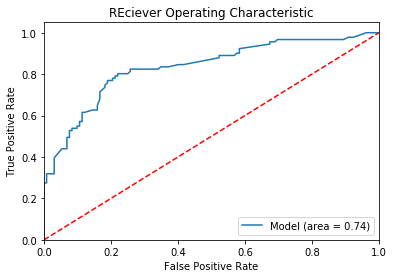

In [40]:
model = CatBoostClassifier(loss_function='Logloss',od_type='IncToDec', od_pval=10e-10, verbose=False,
                        task_type='GPU', depth=5, boosting_type='Plain', leaf_estimation_backtracking='AnyImprovement')
model = model.fit(X_train, y_train)
AccuracyMetrics(X_test, y_test, model)
ModelScore(X_test, y_test, model)

In [15]:
y_pred_log = model_log.predict(X_test)
y_pred_proba_log = model_log.predict_proba(X_test)
ypred_svc = model_svc.predict(X_test)
ypred_proba_svc = model_svc.predict_proba(X_test)
ypred_rf = model_rf.predict(X_test)
ypred_proba_rf = model_rf.predict_proba(X_test)
ypred_gb = model_gb.predict(X_test)
ypred_proba_gb = model_gb.predict_proba(X_test)
print('1= Survived', '0= Did Not Survive')
#print(classification_report(y_test, y_pred))
roc_auc_log = roc_auc_score(y_test, y_pred_proba_log[:,1])
roc_auc_svc = roc_auc_score(y_test, ypred_svc)
roc_auc_rf = roc_auc_score(y_test, ypred_rf)
roc_auc_gb = roc_auc_score(y_test, ypred_gb)
fpr_log, tpr_log, thresholds_log = roc_curve(y_test, y_pred_proba_log[:,1])
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, ypred_proba_svc[:,1])
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, ypred_proba_rf[:,1])
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, ypred_proba_gb[:,1])
plt.figure(figsize=(12,12))
plt.plot(fpr_log, tpr_log, label='LOG Model (area = %.3f)'% roc_auc_log, color='b')
plt.plot(fpr_svc, tpr_svc, label='SVC Model (area = %.3f)'% roc_auc_svc, color='m')
plt.plot(fpr_rf, tpr_rf, label='RF Model (area = %.3f)'% roc_auc_rf, color='g')
plt.plot(fpr_gb, tpr_gb, label='GB Model (area = %.3f)'% roc_auc_gb, color='r')
plt.plot([0,1],[0,1], 'k--', label='Random Selection (area = .500)')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('REciever Operating Characteristic')
plt.legend(loc='lower right')
plt.show

print(fpr_log)

NameError: name 'model_log' is not defined

As seen in the above outputs for evaluating the models preformance on predicting the survival on the test set

In [11]:
clf = SVC(C=10, kernel='rbf', degree=2, gamma=.05, probability=True)
model = clf.fit(X_train, y_train)
predictions = model.predict(X_test)
test_scores = y_test
proba_pred = model.predict_proba(X_test)[:,1]


In [13]:
zipped3 = list(zip(proba_pred, predictions, test_scores))
pred_df = pd.DataFrame(zipped3, columns=['Predicted Prob of Survive(1)','Pred Survive or No','Actual Survive'])
display(pred_df)

,Predicted Prob of Survive(1),Pred Survive or No,Actual Survive
0,0.664234,1,0
1,0.141890,0,0
2,0.945089,1,1
3,0.158673,0,0
4,0.164100,0,1
5,0.207320,0,0
6,0.156110,0,0
7,0.169405,0,1
8,0.723750,1,0
9,0.824538,1,1


In [14]:
path = 'C:\\Users\\graha\\Desktop\\TitanicTest\\titanic_test_for_rand.csv'
header = []
pred_df.to_csv(path_or_buf=path)


In [7]:
clf = SVC(C=10, kernel='rbf', degree=2, gamma=.05, probability=True)
model = clf.fit(X_train_full, y_train_full)
predictions = model.predict(test_df)
test_ids = test_copy.loc[:,'PassengerId']
proba_pred = 
zipped3 = list(zip(test_ids, predictions))
pred_df = pd.DataFrame(zipped3, columns=['PassengerId', 'Survived'])
display(pred_df)




,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [20]:
path = 'C:\\Users\\graha\\Desktop\\TitanicTest\\titanic_test.csv'
header = ['PassengerId', 'Survivedf']
pred_df.to_csv(path_or_buf=path)


Now going to take the ouputs of these models and create a new dataset based off what they predict when running the training data back through the model that was built off that same data.  Make a new dataframe with their outputs and run a few models with the newly created dataframe as the training data

In [48]:
#CURRENTLY HAVE THE ZIPPED1 objects being zipped as predict_proba() so two columns, was predict() so just one column 
zipped1 = list(zip(GBoost.iloc[:,0], GBoost.iloc[:,1],SupV.iloc[:,0], SupV.iloc[:,1], Ada.iloc[:,0], Ada.iloc[:,1], 
                   Forest.iloc[:,0], Forest.iloc[:,1], logistic.iloc[:,0], logistic.iloc[:,1]))
pred_df = pd.DataFrame(zipped1, columns=['GB PoS','GB PoNS', 'SVC PoS','SVC PoNS', 'Ada PoS','Ada PoNS',
                                         'Forest PoS', 'Forest PoNS', 'Logit PoS', 'Logit PoNS'])
display(pred_df.head())

,GB PoS,GB PoNS,SVC PoS,SVC PoNS,Ada PoS,Ada PoNS,Forest PoS,Forest PoNS,Logit PoS,Logit PoNS
0,8.001023e-01,0.199898,0.887810,0.112190,0.504665,0.495335,0.827126,0.172874,0.880481,0.119519
1,4.285765e-08,1.000000,0.091291,0.908709,0.410458,0.589542,0.112207,0.887793,0.068279,0.931721
2,5.332750e-01,0.466725,0.379452,0.620548,0.500430,0.499570,0.536841,0.463159,0.411213,0.588787
3,1.761817e-05,0.999982,0.096937,0.903063,0.422440,0.577560,0.108007,0.891993,0.100833,0.899167
4,9.583395e-01,0.041660,0.885991,0.114009,0.510451,0.489549,0.930219,0.069781,0.960064,0.039936


In [65]:
full_df = pd.concat([pred_df, train_df_cleaned_copy.reindex(pred_df.index)], axis=1)
full_df = full_df.dropna(axis=0, inplace=False)
#full_df = full_df.join(train_df)
pd.set_option('display.max_rows',None)
display(full_df.head())
#full_df.drop(full_df.index[[61,829]], inplace=True)
full_df.info()

,GB PoS,GB PoNS,SVC PoS,SVC PoNS,Ada PoS,Ada PoNS,Forest PoS,Forest PoNS,Logit PoS,Logit PoNS,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,IsAlone
0,8.001023e-01,0.199898,0.887810,0.112190,0.504665,0.495335,0.827126,0.172874,0.880481,0.119519,0.0,3.0,1.0,1.0,0.0,0.0,2.0,0.0
1,4.285765e-08,1.000000,0.091291,0.908709,0.410458,0.589542,0.112207,0.887793,0.068279,0.931721,1.0,1.0,0.0,3.0,2.0,1.0,2.0,0.0
2,5.332750e-01,0.466725,0.379452,0.620548,0.500430,0.499570,0.536841,0.463159,0.411213,0.588787,1.0,3.0,0.0,1.0,0.0,0.0,1.0,1.0
3,1.761817e-05,0.999982,0.096937,0.903063,0.422440,0.577560,0.108007,0.891993,0.100833,0.899167,1.0,1.0,0.0,3.0,2.0,0.0,2.0,0.0
4,9.583395e-01,0.041660,0.885991,0.114009,0.510451,0.489549,0.930219,0.069781,0.960064,0.039936,0.0,3.0,1.0,3.0,0.0,0.0,1.0,1.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 887 entries, 0 to 888
Data columns (total 18 columns):
GB PoS         887 non-null float64
GB PoNS        887 non-null float64
SVC PoS        887 non-null float64
SVC PoNS       887 non-null float64
Ada PoS        887 non-null float64
Ada PoNS       887 non-null float64
Forest PoS     887 non-null float64
Forest PoNS    887 non-null float64
Logit PoS      887 non-null float64
Logit PoNS     887 non-null float64
Survived       887 non-null float64
Pclass         887 non-null float64
Sex            887 non-null float64
Age            887 non-null float64
Fare           887 non-null float64
Embarked       887 non-null float64
FamilySize     887 non-null float64
IsAlone        887 non-null float64
dtypes: float64(18)
memory usage: 131.7 KB


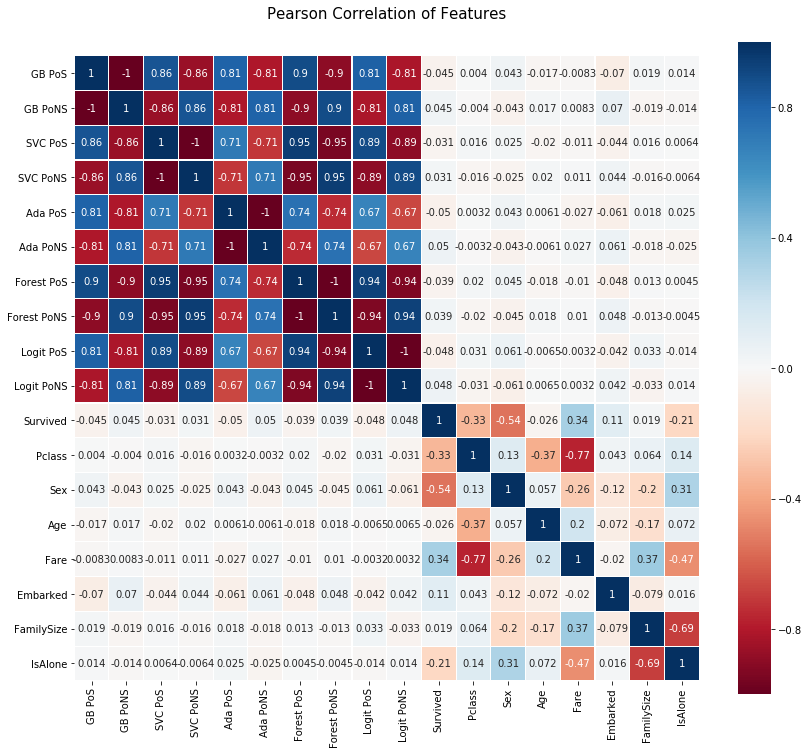

In [66]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(full_df.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [68]:
y_train_full = full_df.loc[:,'Survived']
X_train_stack = full_df.loc[:, pred_df.columns != 'Survived']
X_train, X_test, y_train, y_test = train_test_split(X_train_stack, y_train_full, test_size=.25, random_state=0)

In [69]:
clf = init = RandomForestClassifier(n_estimators=150, criterion='gini', max_depth=5, min_samples_split=3, min_samples_leaf=2,
                             max_features='auto', bootstrap=False, random_state=0)
clf = GradientBoostingClassifier(n_estimators=1000, min_samples_split=5, max_depth=5, min_samples_leaf=2, init=init,
                                random_state=0, max_features=4)
model = clf.fit(X_train, y_train)
AccuracyMetrics(X_test,y_test)

Model Accuracy Score: 0.5900900900900901
Correctly predicted survive 18  times
Correctly predicted not survive 70  times
Incorrectly predicted survive 21  times
Incorrectly predicted not survive 70  times


After fitting a few models to the dataset, none of the predictions have been all that great.  You'll likely notice that every model predicts equal counts of true and false predictions of a passenger surviving. Now it's time to readress the data, we'll start by increasing our cut off criteria for the p-value evaluation of the features' signifigance.  Rather than p < .05, we'll adopt p<.000005.
Dropping columns below:

In [70]:
clf = SVC(C=10, kernel='rbf', degree=2, gamma=.05)
model = clf.fit(X_train, y_train)
AccuracyMetrics(X_test,y_test)

Model Accuracy Score: 0.6036036036036037
Correctly predicted survive 0  times
Correctly predicted not survive 88  times
Incorrectly predicted survive 0  times
Incorrectly predicted not survive 88  times


In [76]:
train_df.drop(columns=['Age','Parch','Embarked','SibSp'], inplace=True)
display(train_df.head())

,Survived,Pclass,Sex,Fare,FamilySize,IsAlone
0,0,3,1,0.0,2,0
1,1,1,0,2.0,2,0
2,1,3,0,0.0,1,1
3,1,1,0,2.0,2,0
4,0,3,1,0.0,1,1


In [77]:
columns= train_df.columns
chi2 = []
pval = []
for i in columns:
    table = pd.crosstab([train_df['Survived']],train_df[i])
    chi, p, dof, expected = chi2_contingency(table.values)
    chi2.append(chi)
    pval.append(p)

zipped = list(zip(columns,chi2,pval))  
df = pd.DataFrame(zipped, columns=['Feature', 'Chi^2', 'P-Value'])
display(df)

,Feature,Chi^2,P-Value
0,Survived,884.771028,2.006539e-194
1,Pclass,100.980407,1.181362e-22
2,Sex,258.426610,3.779910e-58
3,Fare,111.243634,3.951261e-23
4,FamilySize,81.683656,2.239008e-14
5,IsAlone,36.939565,1.218481e-09


Below: variables are reused now that there are only 4 predicting variables.

In [78]:


y_train_full = train_df.loc[:,'Survived']
X_train_full = train_df.loc[:, train_df.columns!='Survived']
X_train, X_test, y_train, y_test = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

In [79]:
clf = LogisticRegression(C=1000, penalty='l1', solver='liblinear', max_iter=100000, fit_intercept=True )
model = clf.fit(X_train, y_train)
model.score(X_test,y_test)

0.7982062780269058

In [80]:
AccuracyMetrics(X_test,y_test)

Model Accuracy Score: 0.7982062780269058
Correctly predicted survive 59  times
Correctly predicted not survive 23  times
Incorrectly predicted survive 22  times
Incorrectly predicted not survive 23  times


In [20]:
init = RandomForestClassifier(n_estimators=150, criterion='gini', max_depth=5, min_samples_split=3, min_samples_leaf=2,
                             max_features='auto', bootstrap=False, random_state=0)
clf = GradientBoostingClassifier(n_estimators=500, min_samples_split=5, max_depth=3, min_samples_leaf=2, init=init,
                                random_state=0, max_features=4)
model = clf.fit(X_train, y_train)
AccuracyMetrics(X_test,y_test)

Model Accuracy Score: 0.7982062780269058
Correctly predicted survive 59  times
Correctly predicted not survive 23  times
Incorrectly predicted survive 22  times
Incorrectly predicted not survive 23  times
